# Librerias

In [3]:
# !pip install semopy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings("ignore")
import semopy as sem
from semopy import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from Utils import Sem_Fuction

# Funciones

In [2]:
myscale = \
    ['Strongly disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly agree']

# Lectura de los datos

In [53]:
#Lectura de datos
data_train=pd.read_excel("Data\BD_emprendimiento.xlsx")
data_train.head()

,id,Nombre del emprendimiento social (ES):,Dirección,Enfoque territorial,Enfoque territorial: Especifique Departamento,Enfoque territorial: Especifique Ciudad/Municipio/Corregimiento,B.1,B.2,B.3,B.4.,...,F.2.6.2,F.2.6.3,F.2.6.4,F.2.6.5,F.2.6.6,F.2.7.1,F.2.7.2,F.2.7.3,F.2.7.4,F.2.7.5
0,1.0,Bive,"Manizales, Caldas","Región Eje Cafetero y Antioquia, Región Pacífi...",Caldas,45 municipios,Foundation,Está constituida.,2012.0,Several municipalities,...,Strongly agree,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree
1,2.0,Fundación más amor,Oficina virtual.,Región Caribe,Atlántico.,Barranquilla y aledaños.,Foundation,No aplica,2020.0,local community,...,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
2,3.0,Fundación de lupus del caribe,"Cra 50 #80-90, Barranquilla - Colombia",Región Caribe,Atlántico,Todos los corregimiento del Atlántico,Foundation,Ninguna,2017.0,One department,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
3,4.0,Corporación Investigativa Cultural Kariguaña,Carrera 24 # 24 A - 42,Región Caribe,Atlántico,Malambo,Corporation,Complejidad de documentos y trámites legales.,2020.0,Several municipalities,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Strongly agree,Agree
4,5.0,Futbol con corazon,"Cra. 59 ##74 - 73, Baranquilla",Región Caribe,Atlántico,Corregimientos aledaños al atlántico,Foundation,Ninguno,2005.0,Colombia / National,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree


# Data preparation

In [54]:
#aspectos sociales
#data_train.iloc[:,16:25].columns
s0=data_train[['B.11.1','B.11.2','B.11.7','B.11.8']]
Sem_Fuction.Coding(s0,myscale,"AS")
s0=s0.select_dtypes(include = "float64")

In [55]:
#Apoyo del gobierno
s1=data_train[['C.1.1', 'C.1.2', 'C.1.3', 'C.1.4', 'C.1.5', 'C.1.6', 'C.1.7', 'C.1.8','C.1.9']].replace('Neutral, Agree','Neutral')
#data_train.iloc[:,31:40].columns
s1=s1.replace('Disagree, Neutral','Neutral')
Sem_Fuction.Coding(s1,myscale,"AG")
s1=s1.select_dtypes(include = "float64")

In [56]:
# Entorno
#data_train.iloc[:,54:60].columns
s2=data_train[['C.3.1.1', 'C.3.1.2', 'C.3.1.3', 'C.3.1.4', 'C.3.1.5', 'C.3.1.6']]
Sem_Fuction.Coding(s2,myscale,"E")
s2=s2.select_dtypes(include = "float64")

In [57]:
# Redes
s3=data_train[['C.2.4.8', 'C.2.4.9', 'C.2.4.10']]
Sem_Fuction.Coding(s3,myscale,"R")
s3=s3.select_dtypes(include = "float64")

In [58]:
# Plan de negocio
#data_train.iloc[:,90:100].columns
s4=data_train[['D.1.1.3','D.1.1.7', 'D.1.1.8','D.1.1.10']].replace('Agree, Strongly agree','Agree')
s4=s4.replace('Neutral, Agree','Neutral')
Sem_Fuction.Coding(s4,myscale,"Pn")
s4=s4.select_dtypes(include = "float64")

In [59]:
#Medios financieros
#data_train.iloc[:,100:108].columns
s5=data_train[['D.2.1.1', 'D.2.1.2', 'D.2.1.3', 'D.2.1.4', 'D.2.1.5', 'D.2.1.6','D.2.1.7', 'D.2.1.8']].replace('Disagree, Neutral','Neutral')
s5=s5.replace('Neutral, Agree','Neutral')
Sem_Fuction.Coding(s5,myscale,"MF")
s5=s5.select_dtypes(include = "float64")

In [60]:
#Capital humano
s6=data_train[['D.3.3.1',  'D.3.3.6', 'D.3.3.7']]#.replace('En desacuerdo, Neutral','Neutral')
# data_train.iloc[:,126:134].columns
Sem_Fuction.Coding(s6,myscale,"CH")
s6=s6.select_dtypes(include = "float64")

In [61]:
#innovación
s7=data_train[['D.4.1.4', 'D.4.1.5', 'D.4.1.6','D.4.1.7', 'D.4.1.8', 'D.4.1.9','D.4.1.11','D.4.1.12']]
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
Sem_Fuction.Coding(s7,myscale1,"I")
s7=s7.select_dtypes(include = "float64")

In [62]:
#Capital social
s8=data_train[['D.5.1.1', 'D.5.1.2', 'D.5.1.3','D.5.1.4','D.5.1.5']]
#data_train.iloc[:,156:165].columns
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
Sem_Fuction.Coding(s8,myscale1,"CS")
s8=s8.select_dtypes(include = "float64")

In [63]:
#Educacion
# s9=data_train.iloc[:,182]
educacion=[]
for i in range(120):
  if data_train.iloc[:,182][i]=='Posgrado incompleto':
    educacion.append(1)
  else:
    if data_train.iloc[:,182][i]=='Profesional completo':
        educacion.append(1)
    else:
      if data_train.iloc[:,182][i]=='Posgrado completo':
        educacion.append(1)
      else:
        educacion.append(0)
s9=pd.DataFrame(educacion, columns=["Ed1"])

In [64]:
#Experiencia
s10=pd.DataFrame(data_train.iloc[:,185].to_list(), columns=["Expe"])


In [65]:
#Habilidades de emprendimiento
#data_train.iloc[:,212:217].columns
s11=data_train[['E.11.1.1', 'E.11.1.2', 'E.11.1.3', 'E.11.1.4', 'E.11.1.5']]
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
Sem_Fuction.Coding(s11,myscale1,"HE")
s11=s11.select_dtypes(include = "float64")

In [66]:
#Desempeño economico (F.1.2.6)
s12=data_train.iloc[:,223]/100000000
s12=pd.DataFrame(s12.to_list(), columns=["Desempeno_econo1"])

In [67]:
Desempeno2=[]
for i in range(120):
  if data_train.iloc[:,218][i]=='Mayor que 16%':
    Desempeno2.append(1)
  else:
    if data_train.iloc[:,218][i]=='De 12 a menos de 16 %':
        Desempeno2.append(1)
    else:
      if data_train.iloc[:,218][i]=='De 8 a menos de 12 %':
        Desempeno2.append(1)
      else:
        Desempeno2.append(0)

s13=pd.DataFrame(Desempeno2, columns=["Desempeno_econo2"])

In [68]:
#crecimiento en utilidades
Desempeno3=[]
for i in range(120):
  if data_train.iloc[:,221][i]=='Menor que $25.000.000':
    Desempeno3.append(0)
  else:
    Desempeno3.append(1)


s14=pd.DataFrame(Desempeno3, columns=["Desempeno_econo3"])

In [69]:
# Desempeño social
#contribucion social 
s15=data_train[['F.2.6.1', 'F.2.6.2', 'F.2.6.3', 'F.2.6.4', 'F.2.6.5', 'F.2.6.6']]
#data_train.iloc[:,233:239].columns
myscale1 = \
    ['Strongly disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly agree']
Sem_Fuction.Coding(s15,myscale1,"desempeno_social1")
s15=s15.select_dtypes(include = "float64")

In [70]:
# Resultado social
s16=data_train[['F.2.7.1', 'F.2.7.2', 'F.2.7.3', 'F.2.7.4', 'F.2.7.5']]
#data_train.iloc[:,239:244]#.replace('Neutral, De acuerdo','Neutral').replace('Muy en desacuerdo, En desacuerdo','En desacuerdo').replace('Muy en desacuerdo, Muy de acuerdo','Neutral')
# define my selections
myscale1 = \
    ['Strongly disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly agree']

Sem_Fuction.Coding(s16,myscale1,"desempeno_social2")
s16=s16.select_dtypes(include = "float64")

In [71]:
#crecimiento en utilidades
DesempenoS=[]
for i in range(120):
  if data_train.iloc[:,226][i]=='Mayor que 16%':
    DesempenoS.append(1)
  else:
    DesempenoS.append(0)


s17=pd.DataFrame(DesempenoS, columns=["desempeno_social3"])

In [72]:
bd_pls=pd.concat([s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17], axis=1)
bd_pls.head()

,ASB.11.1,ASB.11.2,ASB.11.7,ASB.11.8,AGC.1.1,AGC.1.2,AGC.1.3,AGC.1.4,AGC.1.5,AGC.1.6,...,desempeno_social1F.2.6.3,desempeno_social1F.2.6.4,desempeno_social1F.2.6.5,desempeno_social1F.2.6.6,desempeno_social2F.2.7.1,desempeno_social2F.2.7.2,desempeno_social2F.2.7.3,desempeno_social2F.2.7.4,desempeno_social2F.2.7.5,desempeno_social3
0,4.0,4.0,4.0,3.0,3.0,3.0,0.0,3.0,2.0,3.0,...,3.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,0
1,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,0
2,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0
3,2.0,3.0,2.0,3.0,1.0,1.0,0.0,1.0,2.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,0
4,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0


In [73]:
bd_pls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ASB.11.1                  120 non-null    float64
 1   ASB.11.2                  120 non-null    float64
 2   ASB.11.7                  120 non-null    float64
 3   ASB.11.8                  120 non-null    float64
 4   AGC.1.1                   120 non-null    float64
 5   AGC.1.2                   120 non-null    float64
 6   AGC.1.3                   120 non-null    float64
 7   AGC.1.4                   120 non-null    float64
 8   AGC.1.5                   120 non-null    float64
 9   AGC.1.6                   120 non-null    float64
 10  AGC.1.7                   120 non-null    float64
 11  AGC.1.8                   120 non-null    float64
 12  AGC.1.9                   120 non-null    float64
 13  EC.3.1.1                  120 non-null    float64
 14  EC.3.1.2  

In [74]:
# Guardar bae de datos
#bd_pls.to_csv("BD_PLS2.csv")

In [74]:
bd_pls.columns

Index(['ASB.11.1', 'ASB.11.2', 'ASB.11.7', 'ASB.11.8', 'AGC.1.1', 'AGC.1.2',
       'AGC.1.3', 'AGC.1.4', 'AGC.1.5', 'AGC.1.6', 'AGC.1.7', 'AGC.1.8',
       'AGC.1.9', 'EC.3.1.1', 'EC.3.1.2', 'EC.3.1.3', 'EC.3.1.4', 'EC.3.1.5',
       'EC.3.1.6', 'RC.2.4.8', 'RC.2.4.9', 'RC.2.4.10', 'PnD.1.1.3',
       'PnD.1.1.7', 'PnD.1.1.8', 'PnD.1.1.10', 'MFD.2.1.1', 'MFD.2.1.2',
       'MFD.2.1.3', 'MFD.2.1.4', 'MFD.2.1.5', 'MFD.2.1.6', 'MFD.2.1.7',
       'MFD.2.1.8', 'CHD.3.3.1', 'CHD.3.3.6', 'CHD.3.3.7', 'ID.4.1.4',
       'ID.4.1.5', 'ID.4.1.6', 'ID.4.1.7', 'ID.4.1.8', 'ID.4.1.9', 'ID.4.1.11',
       'CSD.5.1.1', 'CSD.5.1.2', 'CSD.5.1.3', 'CSD.5.1.4', 'CSD.5.1.5', 'Ed1',
       'Expe', 'HEE.11.1.1', 'HEE.11.1.2', 'HEE.11.1.3', 'HEE.11.1.4',
       'HEE.11.1.5', 'Desempeno_econo1', 'desempeno_social1F.2.6.1',
       'desempeno_social1F.2.6.2', 'desempeno_social1F.2.6.3',
       'desempeno_social1F.2.6.4', 'desempeno_social1F.2.6.5',
       'desempeno_social1F.2.6.6', 'Desempeno_econo2'],
      

# Model 1 (F.1.2.6)


In [22]:
mod = ''' 

# Measurement part

Apoyo_gobierno =~ AGC.1.1 + AGC.1.2 + AGC.1.3 + AGC.1.4 + AGC.1.5 + AGC.1.6 + AGC.1.7 + AGC.1.8 + AGC.1.9
Entorno =~ EC.3.1.1 +  EC.3.1.2 + EC.3.1.3 + EC.3.1.4 + EC.3.1.5 + EC.3.1.6
Redes =~ RC.2.4.1 + RC.2.4.8 + RC.2.4.9 + RC.2.4.10
Capital_humano =~ CHD.3.3.1 + CHD.3.3.6 + CHD.3.3.7
Plan_negocio =~ PnD.1.1.1 + PnD.1.1.2 + PnD.1.1.3 + PnD.1.1.4 + PnD.1.1.9
Capital_social =~ CSD.5.1.1 + CSD.5.1.2 + CSD.5.1.3 + CSD.5.1.16 + CSD.5.1.18 + CSD.5.1.19
Medios_financieros =~ MFD.2.1.1 + MFD.2.1.2 + MFD.2.1.3 + MFD.2.1.4 + MFD.2.1.5 + MFD.2.1.6 + MFD.2.1.7 + MFD.2.1.8
Innovacion =~ ID.4.1.4 + ID.4.1.5 + ID.4.1.6 + ID.4.1.7 + ID.4.1.8 + ID.4.1.9 + ID.4.1.11
Habilidad_empre =~ HEE.11.1.1 + HEE.11.1.2 + HEE.11.1.3 + HEE.11.1.4 + HEE.11.1.5
Desempeño_social =~ DSF.2.6.1 + DSF.2.6.2 + DSF.2.6.3 + DSF.2.6.4 + DSF.2.6.5 + DSF.2.6.6


# Structural part

Capital_social ~ Plan_negocio
Innovacion ~ Capital_social
Medios_financieros ~ Apoyo_gobierno
Entorno ~ Plan_negocio + Apoyo_gobierno + Habilidad_empre
Habilidad_empre ~ Capital_humano + Medios_financieros + Expe + Ed1
Expe ~ Redes
Ed1 ~ Redes
Desempeno2 ~ Ed1 + Expe + Redes + Habilidad_empre + Entorno + Plan_negocio + Medios_financieros + Innovacion
Desempeño_social ~ Ed1 + Expe + Redes + Habilidad_empre + Entorno + Plan_negocio + Medios_financieros + Innovacion
'''
model = Model(mod)


In [ ]:
      #  DEFINE(ordinal) AGC.1.1 AGC.1.2 AGC.1.3 AGC.1.4 AGC.1.5 AGC.1.6 AGC.1.7 AGC.1.8 AGC.1.9 EC.3.1.1 EC.3.1.2 EC.3.1.3 EC.3.1.4 EC.3.1.5 EC.3.1.6 RC.2.4.1 RC.2.4.8 RC.2.4.9 RC.2.4.10 PnD.1.1.1 PnD.1.1.2 PnD.1.1.3 PnD.1.1.4 PnD.1.1.9 MFD.2.1.1 MFD.2.1.2 MFD.2.1.3 MFD.2.1.4 MFD.2.1.5 MFD.2.1.6 MFD.2.1.7 MFD.2.1.8 CHD.3.3.1',

      #  'CHD.3.3.6', 'CHD.3.3.7', 'ID.4.1.4', 'ID.4.1.5', 'ID.4.1.6',
      #  'ID.4.1.7', 'ID.4.1.8', 'ID.4.1.9', 'ID.4.1.11', 'CSD.5.1.1',
      #  'CSD.5.1.2', 'CSD.5.1.3', 'CSD.5.1.16', 'CSD.5.1.18', 'CSD.5.1.19',
      #   'HEE.11.1.1', 'HEE.11.1.2', 'HEE.11.1.3', 'HEE.11.1.4',
      #  'HEE.11.1.5', , 'DSF.2.6.1', 'DSF.2.6.2', 'DSF.2.6.3',
      #  'DSF.2.6.4', 'DSF.2.6.5', 'DSF.2.6.6'

In [23]:
# The second step
# objective: GLS , ULS  FIML, MLW
# method: SLSQP, https://docs.scipy.org/doc/scipy/tutorial/optimize.html
res=model.fit(bd_pls, obj="MLW", solver="SLSQP")

In [24]:
print(res)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 58.044
Number of iterations: 183
Params: 0.950 0.868 0.957 1.061 0.752 0.790 1.030 1.064 1.125 0.701 0.756 0.985 1.381 1.418 1.623 1.265 1.291 1.242 0.508 2.150 1.306 1.639 1.406 1.351 0.824 1.086 1.144 0.906 0.956 0.848 0.925 0.911 0.864 0.828 1.188 1.301 1.204 1.334 1.436 0.915 0.992 0.931 0.952 0.935 1.055 1.212 1.238 1.186 1.127 0.019 0.305 0.931 0.708 0.588 -0.033 0.396 0.092 -0.006 -0.084 9.569 0.092 0.168 -0.001 0.037 0.055 0.341 -0.761 0.288 -0.072 0.070 0.001 0.171 -0.014 -0.119 0.531 -0.076 0.078 0.102 0.191 0.100 0.005 0.176 0.245 0.040 0.043 0.121 0.006 0.035 0.135 0.181 0.039 0.080 0.045 0.134 0.232 0.160 0.060 0.166 0.056 0.015 0.263 0.020 0.015 0.103 0.042 0.035 0.082 0.018 53.364 0.039 0.203 0.178 0.005 0.200 0.051 0.053 0.148 0.109 0.092 0.057 0.132 0.152 0.184 0.162 0.293 0.106 0.179 0.043 0.075 0.023 0.089 0.042 0.038 0.223 0.146 0.120 0.07

In [25]:
result=pd.DataFrame(model.inspect())
result.head(20)

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Capital_social,~,Plan_negocio,0.018722,0.083748,0.223557,0.823102
1,Innovacion,~,Capital_social,0.304685,0.147555,2.06489,0.038933
2,Medios_financieros,~,Apoyo_gobierno,0.931098,0.067966,13.699405,0.0
3,Entorno,~,Plan_negocio,0.708029,0.256958,2.755429,0.005862
4,Entorno,~,Apoyo_gobierno,0.588460,0.068076,8.644207,0.0
5,Entorno,~,Habilidad_empre,-0.033322,0.0808,-0.412399,0.680047
6,Habilidad_empre,~,Capital_humano,0.396237,0.309398,1.280672,0.200309
7,Habilidad_empre,~,Medios_financieros,0.092247,0.047877,1.926742,0.054012
8,Habilidad_empre,~,Expe,-0.005708,0.00601,-0.949787,0.342221
9,Habilidad_empre,~,Ed1,-0.084103,0.141558,-0.594119,0.552432


In [26]:

sem.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,1798,1891,6965.272381,0.0,14266.679858,0.582466,0.51178,0.486528,0.51178,0.560869,0.155404,193.912127,625.973347,58.043937


In [27]:
g = sem.semplot(model, "model1.png")

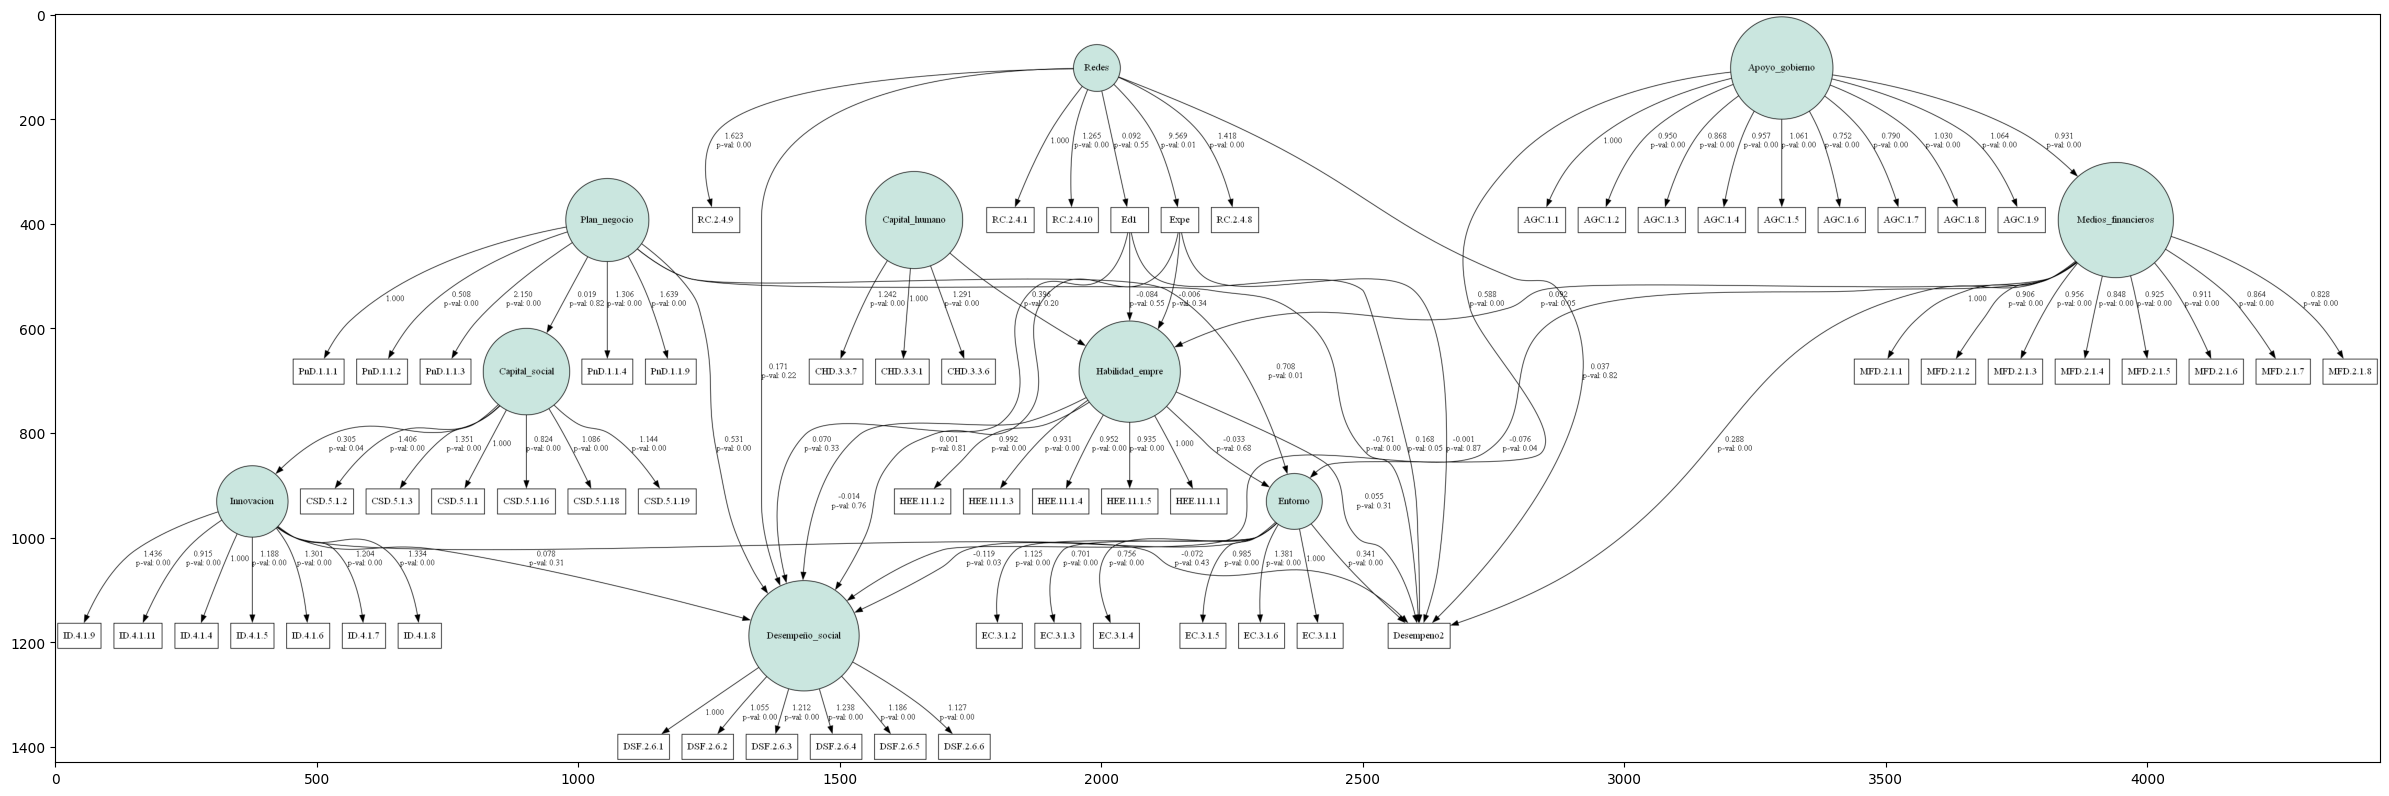

In [28]:
plt.rcParams["figure.figsize"] = (30,40)
img = mpimg.imread('model3.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# result.to_csv("resultado1.csv")

#### Desempeño economico (F.1.2.1. Cuál es la tasa promedio de crecimiento potencial de su empresa :)

In [33]:
mod = ''' 
# measurement part
Apoyo_gobierno =~ AGC.1.1 + AGC.1.2 + AGC.1.3 + AGC.1.4 + AGC.1.5 + AGC.1.6 + AGC.1.7 + AGC.1.8 + AGC.1.9
Entorno =~ EC.3.1.1 +  EC.3.1.2 + EC.3.1.3 + EC.3.1.4 + EC.3.1.5 + EC.3.1.6
Redes =~ RC.2.4.1 + RC.2.4.8 + RC.2.4.9 + RC.2.4.10
Capital_humano =~ CHD.3.3.1 + CHD.3.3.6 + CHD.3.3.7
Plan_negocio =~ PnD.1.1.1 + PnD.1.1.2 + PnD.1.1.3 + PnD.1.1.4 + PnD.1.1.9
Capital_social =~ CSD.5.1.1 + CSD.5.1.2 + CSD.5.1.3 + CSD.5.1.16 + CSD.5.1.18 + CSD.5.1.19
Medios_financieros =~ MFD.2.1.1 + MFD.2.1.2 + MFD.2.1.3 + MFD.2.1.4 + MFD.2.1.5 + MFD.2.1.6 + MFD.2.1.7 + MFD.2.1.8
Innovacion =~ ID.4.1.4 + ID.4.1.5 + ID.4.1.6 + ID.4.1.7 + ID.4.1.8 + ID.4.1.9 + ID.4.1.11
Habilidad_empre =~ HEE.11.1.1 + HEE.11.1.2 + HEE.11.1.3 + HEE.11.1.4 + HEE.11.1.5
Desempeño_social =~ DSF.2.6.1 + DSF.2.6.2 + DSF.2.6.3 + DSF.2.6.4 + DSF.2.6.5 + DSF.2.6.6
# structural part
Capital_social ~ Plan_negocio
Innovacion ~ Capital_social
Medios_financieros ~ Apoyo_gobierno
Entorno ~ Plan_negocio + Apoyo_gobierno + Habilidad_empre
Habilidad_empre ~ Capital_humano + Medios_financieros + Expe + Ed1
Expe ~ Redes
Ed1 ~ Redes
Desempeno_econo ~ Ed1 + Expe + Redes + Habilidad_empre + Entorno + Plan_negocio + Medios_financieros + Innovacion
Desempeño_social ~ Ed1 + Expe + Redes + Habilidad_empre + Entorno + Plan_negocio + Medios_financieros + Innovacion
'''
model = Model(mod)


In [34]:
res=model.fit(bd_pls, obj="MLW", solver="SLSQP")
print(res)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 57.900
Number of iterations: 191
Params: 0.950 0.869 0.957 1.061 0.753 0.791 1.030 1.065 1.125 0.705 0.759 0.993 1.388 1.425 1.629 1.275 1.288 1.245 0.492 2.109 1.287 1.636 1.406 1.351 0.824 1.087 1.144 0.906 0.954 0.846 0.924 0.912 0.866 0.829 1.188 1.300 1.203 1.332 1.436 0.914 0.992 0.931 0.952 0.935 1.055 1.211 1.238 1.186 1.126 0.020 0.305 0.931 0.713 0.582 -0.034 0.395 0.092 -0.006 -0.084 9.618 0.092 0.261 0.006 1.727 0.184 -1.194 2.518 0.311 0.298 0.064 0.001 0.183 -0.018 -0.141 0.617 -0.078 0.072 0.175 0.051 0.245 0.106 0.107 1.394 0.074 0.152 0.147 0.092 0.145 0.040 0.182 0.042 0.262 53.352 0.054 0.040 0.021 0.121 0.080 0.161 0.015 0.023 0.057 0.038 0.181 0.217 0.159 0.233 0.103 0.082 0.035 0.166 0.128 0.042 0.293 0.120 0.089 0.005 0.103 0.018 0.039 0.005 0.035 0.139 0.109 0.042 0.006 0.048 0.045 0.062 0.043 0.053 0.137 0.191 0.110 0.043 0.015 0.179 

In [35]:
result=pd.DataFrame(model.inspect())
result.head(20)

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Capital_social,~,Plan_negocio,0.019512,0.083207,0.234495,0.8146
1,Innovacion,~,Capital_social,0.305001,0.147693,2.065106,0.038913
2,Medios_financieros,~,Apoyo_gobierno,0.931227,0.06803,13.688502,0.0
3,Entorno,~,Plan_negocio,0.713204,0.258143,2.762821,0.00573
4,Entorno,~,Apoyo_gobierno,0.582300,0.068796,8.46417,0.0
5,Entorno,~,Habilidad_empre,-0.033530,0.080712,-0.415431,0.677827
6,Habilidad_empre,~,Capital_humano,0.394642,0.309457,1.275274,0.202212
7,Habilidad_empre,~,Medios_financieros,0.092171,0.047861,1.925813,0.054128
8,Habilidad_empre,~,Expe,-0.005710,0.00601,-0.949975,0.342125
9,Habilidad_empre,~,Ed1,-0.083549,0.141561,-0.590197,0.555058


In [29]:
sem.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,1798,1891,6948.064392,0.0,14155.380083,0.58008,0.509157,0.483769,0.509157,0.558359,0.155145,194.198927,626.260147,57.900537
